In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup as soup
import requests

import warnings
warnings.filterwarnings('ignore')

# Question 1.) Scrape the Worldometer website using the BeautifulSoup and Requests library.

URL:-https://www.worldometers.info/geography/how-many-countries-are-there-in-the-world/

In [2]:
URL = 'https://www.worldometers.info/geography/how-many-countries-are-there-in-the-world/'

In [3]:
response = requests.get(URL)
print(response)

<Response [200]>


In [4]:
wm = soup(response.content, 'lxml')
wm

<!DOCTYPE html>
<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]--><!--[if IE 9]> <html lang="en" class="ie9"> <![endif]--><!--[if !IE]><!--><html lang="en"> <!--<![endif]--> <head> <meta charset="utf-8"/> <meta content="IE=edge" http-equiv="X-UA-Compatible"/> <meta content="width=device-width, initial-scale=1" name="viewport"/> <title>How many countries are there in the world? (2022) - Total &amp; List | Worldometer</title><link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/><link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/><link href="/favicon/apple-icon-60x60.png" rel="apple-touch-icon" sizes="60x60"/><link href="/favicon/apple-icon-72x72.png" rel="apple-touch-icon" sizes="72x72"/><link href="/favicon/apple-icon-76x76.png" rel="apple-touch-icon" sizes="76x76"/><link href="/favicon/apple-icon-114x114.png" rel="apple-touch-icon" sizes="114x114"/><link href="/favicon/apple-icon-120x120.png" rel="apple-touch-icon" sizes="120x120"

# Question 2.) Collect the data of Country wise Population, World_Share(%) and 'Land_Area_Km².

In [5]:
rank = wm.select('td')[0].text
print(rank)
country = wm.select('td')[1].text

1


In [6]:
Rank = []
Country = []
Population = []
World_Share = []
Land_Area = []

for i in range(0, len(wm.findAll('td')),5) :
    Rank.append(wm.select('td')[i].text)
    Country.append(wm.select('td')[i+1].text)
    Population.append(wm.select('td')[i+2].text)
    World_Share.append(wm.select('td')[i+3].text)
    Land_Area.append(wm.select('td')[i+4].text)

In [7]:
print(len(Rank))
print(len(Country))
print(len(Population))
print(len(World_Share))
print(len(Land_Area))

195
195
195
195
195


In [8]:
# Replacing the ',' '%' ','

Population = [i.replace(',', '') for i in Population]
World_Share = [i.replace('%', '') for i in World_Share]
Land_Area = [i.replace(',', '') for i in Land_Area]

In [9]:
# Converting the string columns into integer and float

Rank = [int(i) for i in Rank]
Population = [int(i) for i in Population]
World_Share = [float(i) for i in World_Share]
Land_Area = [int(i) for i in Land_Area]

In [10]:
# Making the Data Frame

df = pd.DataFrame({'Rank' : Rank, 'Country' : Country, 'Population' : Population,
                 'World_Share(%)' : World_Share, 'Land_Area_Km²' : Land_Area})
df.head()

,Rank,Country,Population,World_Share(%),Land_Area_Km²
0,1,Honduras,9904607,0.1,111890
1,2,United Arab Emirates,9890402,0.1,83600
2,3,Djibouti,988000,0.0,23180
3,4,Seychelles,98347,0.0,460
4,5,Antigua and Barbuda,97929,0.0,440


In [11]:
df.dtypes

Rank                int64
Country            object
Population          int64
World_Share(%)    float64
Land_Area_Km²       int64
dtype: object

In [12]:
# Saving the DataFrame

df.to_csv('World_Pop_Data_2020.csv')

# Question 3.) Analyze the data by using matplotlib and seaborn library.

## a. Make a Scatter plot by using Seaborn and Matplotlib of 'Population(2020) vs Land_Area_Km²' and apply the following customization.


                    ● Make the Figure size (8,6)
                    ● Make a scatter plot such as x='Population(2020)',y='Land_Area_Km²',palette='Set'
                    ● Add a title to the Plot with fontsize = 15 and color = purple
                      as 'Population(2020) vs Land_Area_Km²'
                    ● Add Grid to the plot using grid() function
                    ● Also Show the plot using matplotlib show() function

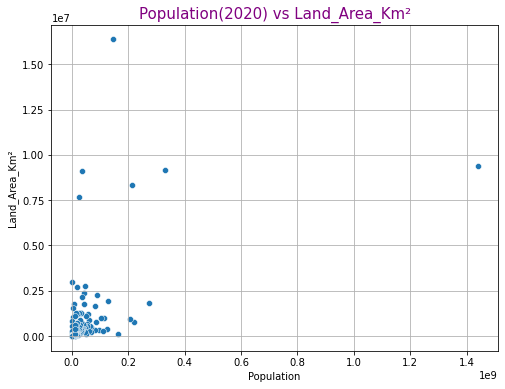

In [13]:
plt.figure(figsize = (8,6))
sns.scatterplot(data = df, x = 'Population', y = 'Land_Area_Km²', palette = 'Set')
plt.title('Population(2020) vs Land_Area_Km²', fontsize = 15, color = 'purple')
plt.grid()
plt.show()

## b. Create a Line plot of 'Country vs Land_Area_Km² for top 5 countries by population' and apply the Following customization to the plot.


                        ● Make the Figure size (15,8)
                        ● Make line/markers color 'indigo'
                        ● Make line width as 2 and line style as '-.'
                        ● Add label as Land_Area_Km²
                        ● Add markers as 'o' with markersize = 10
                        ● Add a title to the Plot with fontsize = 15 and color = purple
                        ● Add X-Label as Country & Y-Label as Land_Area_Km²
                        ● Add Grid to the plot using grid() function
                        ● Show the legend for the plot using legend() funct
                        ● Also Show the plot

In [19]:
# Making the Data Frame for Top 5 Countries by Population

df_top5 = df.sort_values(by = 'Population', ascending = False).head()
df_top5

,Rank,Country,Population,World_Share(%),Land_Area_Km²
158,159,China,1439323776,18.5,9388211
97,98,United States,331002651,4.2,9147420
115,116,Indonesia,273523615,3.5,1811570
126,127,Pakistan,220892340,2.8,770880
130,131,Brazil,212559417,2.7,8358140


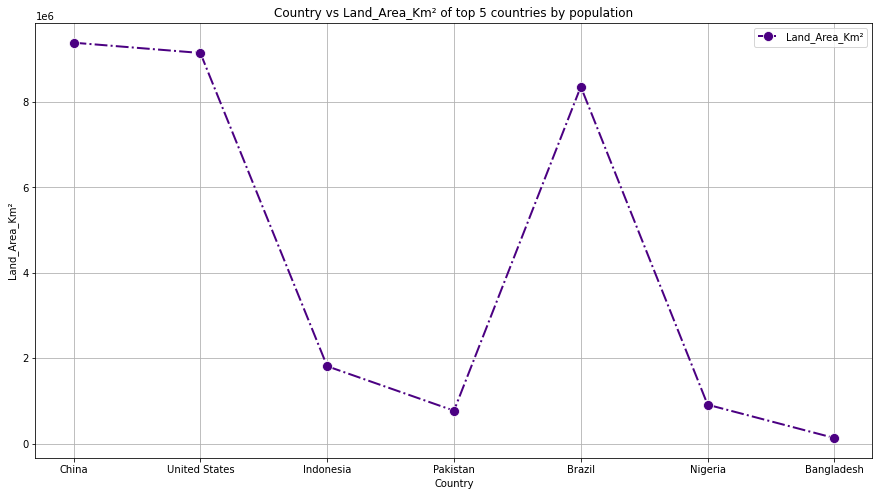

In [15]:
plt.figure(figsize = (15,8))
sns.lineplot(data = df_top5, x = 'Country', y = 'Land_Area_Km²', color = 'indigo', lw = 2,
            linestyle = '-.', label = 'Land_Area_Km²', marker = 'o', markersize = 10)
plt.title('Country vs Land_Area_Km² of top 5 countries by population')
plt.xlabel('Country')
plt.ylabel('Land_Area_Km²')
plt.grid()
plt.legend()
plt.show()

## c. Create a Line plot of 'Country wise Population(2020)' of top 5 countries based on population and apply the Following customization to the plot.


                            ● Make a plot by setting figure size (10,6) using seaborn set() function.
                            ● Set the color palette for the plot using the
                              set_palette() function as "tab10".
                            ● Set the style for the plot using the set_style() function as "darkgrid".
                            ● Set the context for the plot using set_cotext() function with 
                              following customization ("paper",font_scale = 2, rc={"grid.linewidth": 0.5}).
                            ● Make a Bar plot using seaborn barplot() function
                              setting x='Country',y='Population(2020)'.
                            ● Add the title to the plot as 'Country wise Population(2020)'.
                            ● Add X-label as 'Country' and Y-label as 'Country wise Population(2020)'
                            ● Make the Xticks rotate 45 degrees.
                            ● Show the plot using show() function of matplotlib

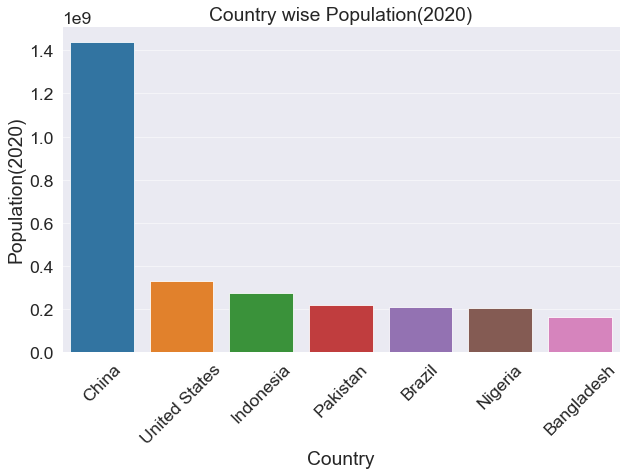

In [16]:
sns.set(rc = {'figure.figsize' : (10,6)})
sns.set_palette('tab10')
sns.set_style('darkgrid')
sns.set_context('paper', font_scale = 2, rc = {'grid.linewidth' : 0.5})

# The question says to make a line plot.
# But if we look in the customizations it says to make a bar plot.
# So, I am going with the bar plot because I have already made a line plot in the previuous question.

sns.barplot(data = df_top5, x = 'Country', y = 'Population')
plt.title('Country wise Population(2020)')
plt.xlabel('Country')
plt.ylabel('Population(2020)')
plt.xticks(rotation = 45)
plt.show()